<a href="https://colab.research.google.com/github/profandersonvanin01/machine_learning/blob/main/01_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
idades = np.random.randint(low=15, high=70, size=40)

idades

array([53, 66, 43, 29, 57, 22, 35, 53, 33, 37, 25, 25, 38, 67, 50, 54, 38,
       17, 36, 67, 16, 38, 58, 44, 52, 16, 35, 47, 26, 36, 58, 39, 63, 41,
       56, 42, 30, 29, 61, 65])

In [2]:
rotulos = []
for idade in idades:
  if idade < 30:
    rotulos.append(0)
  else:
    rotulos.append(1)

#random swap - EMBARALHANDO UM POUCO PARA QUE OUTRAS PESSOAS TENHAM O SEGURO
for i in range(0,3):
  r = np.random.randint(0, len(rotulos) - 1)
  if rotulos[r] == 0:
    rotulos[r] = 1
  else:
    rotulos[r] = 0

In [3]:
rotulos

[1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1]

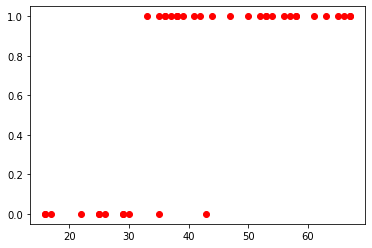

In [4]:
plt.scatter(idades,rotulos, color="red")
plt.show()

In [5]:
# UTILIZANDO REGRESSÃO LINEAR
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(idades.reshape(-1,1), rotulos)

LinearRegression()

In [6]:
# equação da reta: y = mx + b
m = modelo.coef_[0]
b = modelo.intercept_

m,b

(0.022566752303713265, -0.2573944664850353)

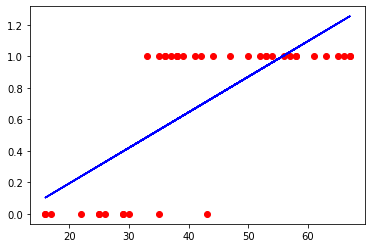

In [7]:
plt.plot(idades, idades * m + b, color="blue")
plt.scatter(idades,rotulos, color="red")
plt.show()

33.56240438551759


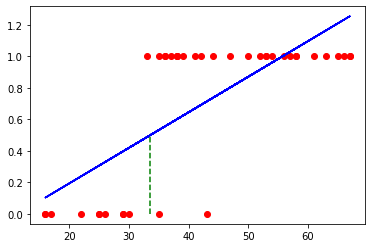

In [8]:
limiar_idade = (0.5 - b)/ m
print(limiar_idade)

plt.plot(idades, idades * m + b, color="blue")
plt.plot([limiar_idade, limiar_idade],[0, 0.5], '--', color='green')
plt.scatter(idades,rotulos, color="red")
plt.show()

# **FUNÇÃO LOGÍSTICA** 

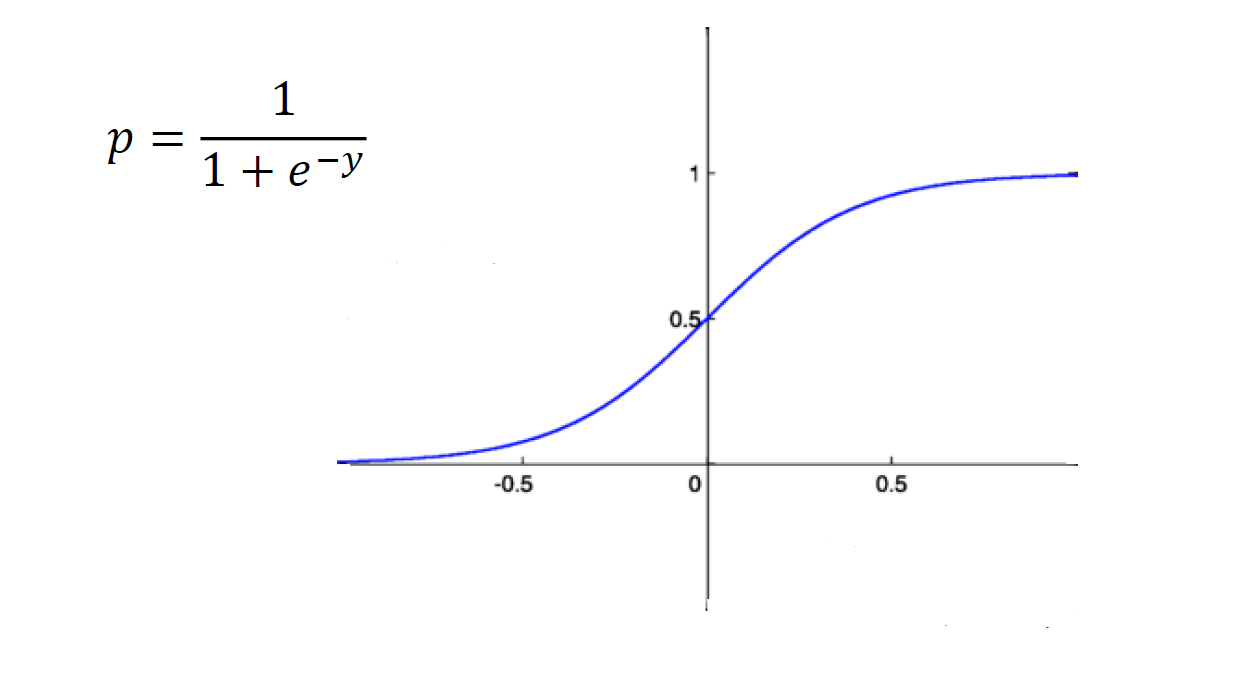

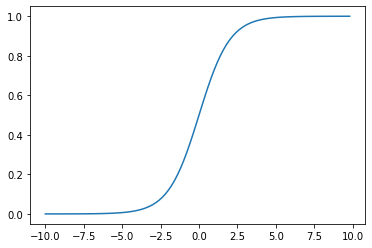

In [9]:
import math
def sigmoid(x):
  a = []
  for item in x:
    a.append(1/(1+math.exp(-item)))
  return a

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)

plt.plot(x, sig)
plt.show()

# Classificador com Sigmoide

33.331480587172706


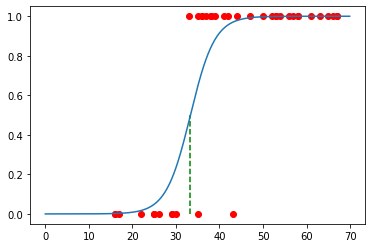

In [10]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression()
modelo.fit(idades.reshape(-1,1), rotulos)

m = modelo.coef_[0][0]
b = modelo.intercept_[0]

x = np.arange(0, 70, 0.1)
sig = sigmoid(m*x + b)

limiar_idade = abs(b/m)
print(limiar_idade)

plt.scatter(idades, rotulos, color="red")
plt.plot([limiar_idade, limiar_idade],[0, 0.5], '--', color='green')
plt.plot(x,sig)
plt.show()